# Logistic regression

## Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, the attributes in this dataset is a subset of the original dataset. Several columns are simply ignored, and some of the important attritubes like age, account balance etc. are retained.

## Dataset: German Credit Risk

- Age (Numeric : Age in years)
- Sex (Categories : male, female)
- Job (Categories : 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (Categories : own, rent, or free)
- Saving accounts (Categories : little, moderate, quite rich, rich)
- Checking account (Categories : little, moderate, rich)
- Credit amount (Numeric : Amount of credit in DM - Deutsche Mark)
- Duration (Numeric : Duration for which the credit is given in months)
- Purpose (Categories: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
- Risk (0 - Person is not at risk, 1 - Pesron is at risk(defaulter))

# Objective

The objective is to estimate probabilities whether a person would default or not using logistic regression. In this dataset, the target variable is 'Risk'.

# 1. Load Libraries and data

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

pdata = pd.read_csv("German_Credit.csv")
pdata.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


# 2. Calculate the percentage of missing values for each column and fill those missing values.


In [8]:
totalvals = pd.DataFrame(pdata.count(), columns = ['Number of entries'])
misvals = pd.DataFrame(pdata.isnull().sum(), columns= ['Number of missing values'])
newdf = pd.merge(totalvals, misvals, how = 'outer', right_index = True, left_index=True)
newdf['percmis'] = (newdf['Number of missing values'] / newdf['Number of entries']) * 100
print(newdf)

## This is wrong, teh number of entris for each column is 1000. df.count() counts without the nans
#Correct code:
# df.isna().sum()/len(df.isna())
#the above code will be implemented on all columns even though it is not specified. 

                  Number of entries  Number of missing values  percmis
Age                            1000                         0     0.00
Sex                            1000                         0     0.00
Job                            1000                         0     0.00
Housing                        1000                         0     0.00
Saving accounts                 817                       183    22.40
Checking account                606                       394    65.02
Credit amount                  1000                         0     0.00
Duration                       1000                         0     0.00
Purpose                        1000                         0     0.00
Risk                           1000                         0     0.00


In [9]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(strategy="most_frequent")
cols=['Saving accounts','Checking account']
imputer = rep_0.fit(pdata[cols])
pdata[cols] = imputer.transform(pdata[cols])

pdata.head()
#pdata.head()


#This is also wrong. Cannot impute unknown categorical data taht is dependant on other factors withy "most frequent"
# Need to imput NaN with unknown as below: 
# df['Saving accounts'].fillna(value='unknown',inplace=True)
# df['Checking account'].fillna(value='unknown',inplace=True)
# df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,little,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


# 3. Plot histogram for columns 'Credit amount' and 'Age'

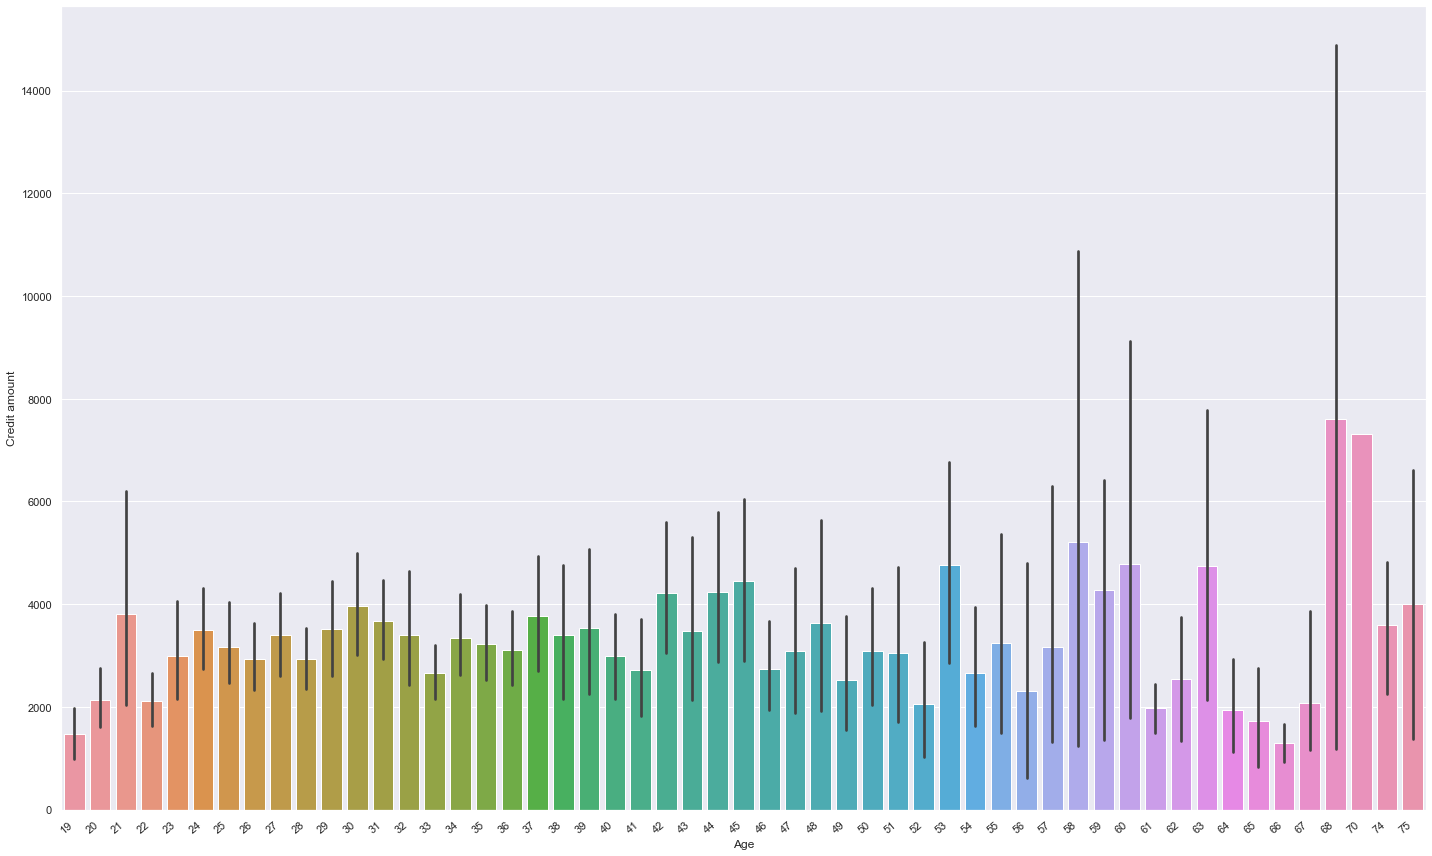

In [10]:
plt.figure(figsize=(20,12))
creditplot = sns.barplot(x='Age', y='Credit amount', data=pdata);
creditplot.set_xticklabels(creditplot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

#This is also wrong. Hiostogram to be plotted as below: 
#df['Age'].hist()

# 4. Create counplots for columns 'Duration', 'Purpose'. What durations are most common and for what purposes most credits are taken?

TypeError: set_xticklabels() missing 1 required positional argument: 'labels'

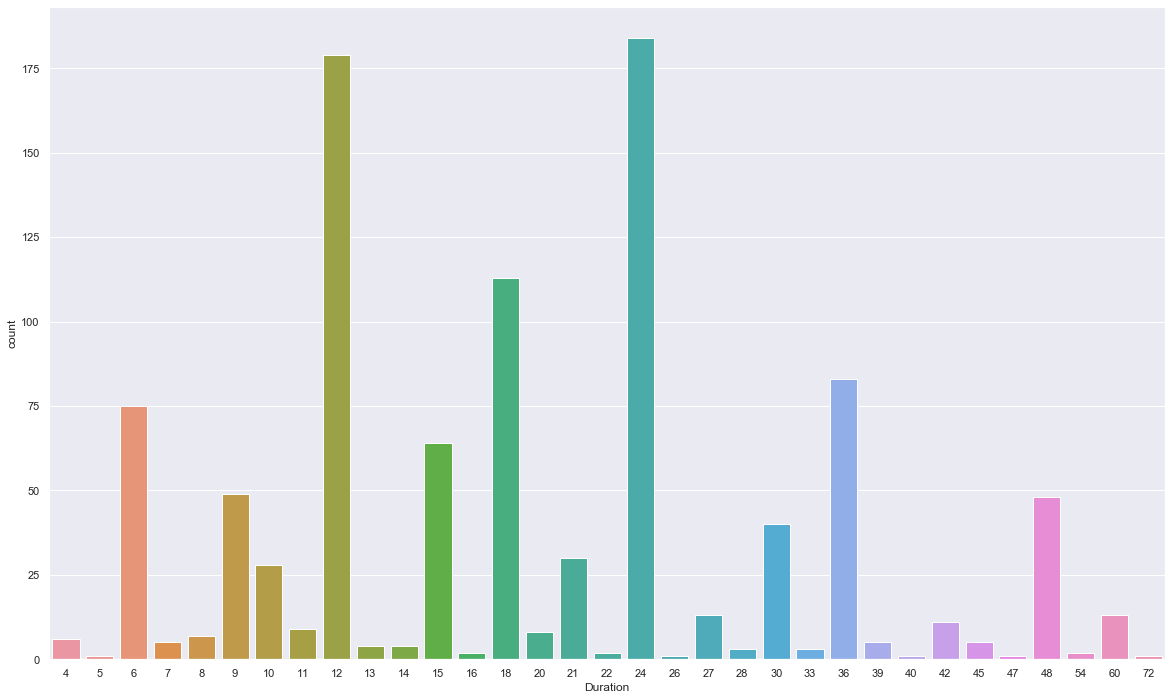

In [14]:
plt.figure(figsize=(20,12))
durplot = sns.countplot(x='Duration', data=pdata)
durplot.set_xticklabels(rotation=40, ha="right")
plt.tight_layout()


#Insight: most common duration - 12 months, 24 months


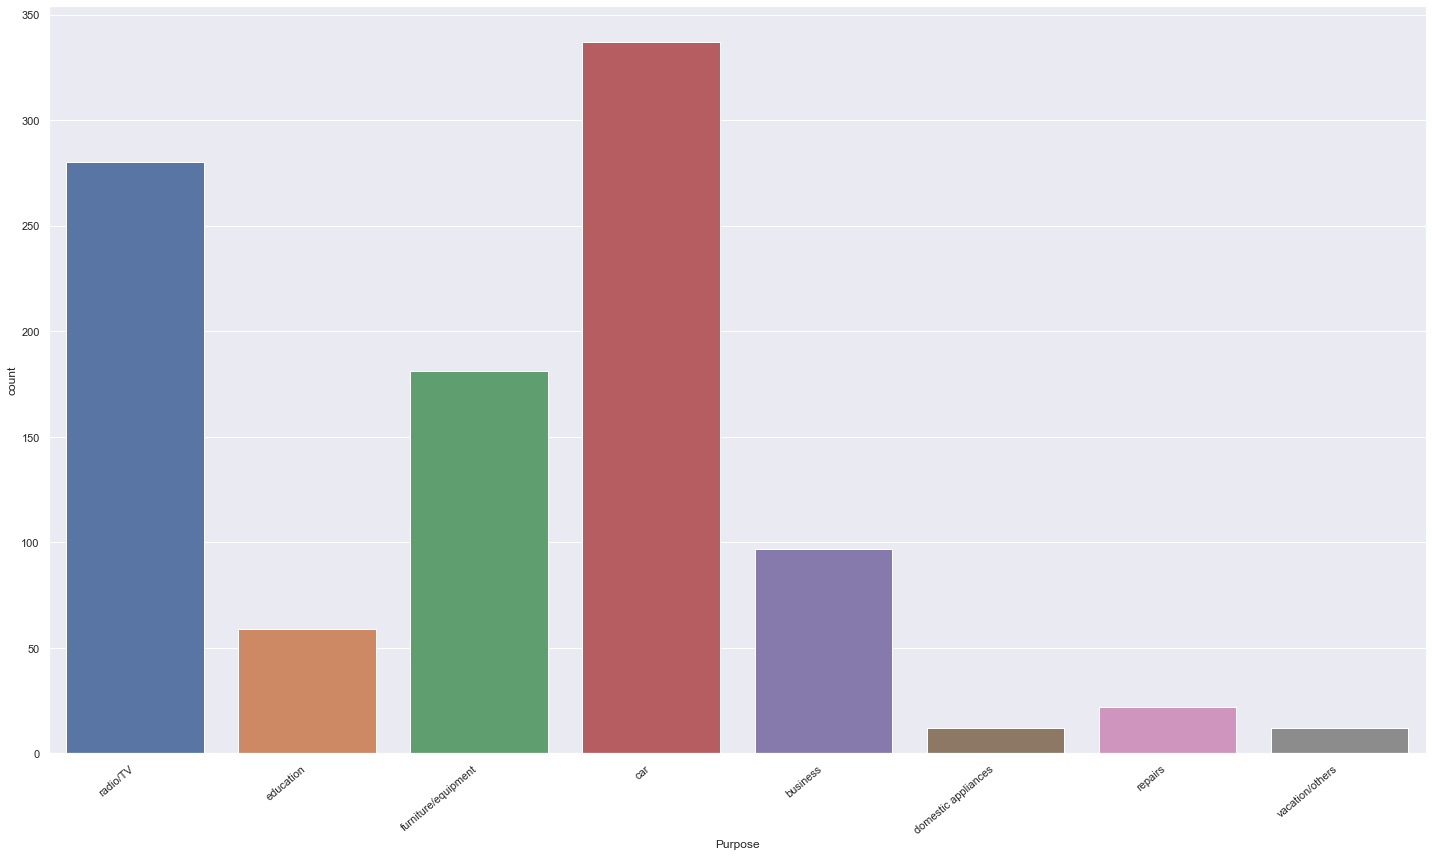

In [15]:
plt.figure(figsize=(20,12))
purplot = sns.countplot(x='Purpose', data=pdata)
purplot.set_xticklabels(purplot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

#Insight: most common purpose - car or radio/tv

# 5. Which 'Job', 'Savings account', 'Checking account' has highest number of defaulters?

In [7]:
jobdef = pdata.groupby(['Job', 'Risk'])[['Risk']].count()
savdef = pdata.groupby(['Saving accounts','Risk'])[['Risk']].count()
checkdef = pdata.groupby(['Checking account','Risk'])[['Risk']].count()
print(jobdef)
print(savdef)
print(checkdef)

#A better way to do this: 
#pd.crosstab(df['Job'],df['Risk'],normalize=False)

          Risk
Job Risk      
0   0       15
    1        7
1   0      144
    1       56
2   0      444
    1      186
3   0       97
    1       51
                      Risk
Saving accounts Risk      
little          0      537
                1      249
moderate        0       69
                1       34
quite rich      0       52
                1       11
rich            0       42
                1        6
                       Risk
Checking account Risk      
little           0      487
                 1      181
moderate         0      164
                 1      105
rich             0       49
                 1       14


In [8]:
# Interpretation: 
# Job2 has the highest number of defaulters, 
# Those with 'little' money in their savings account are the highest defaulters
# Those with 'little' money in their checking account are the highest defaulters

# 6. Convert 'Credit amount' and 'Age' into categorical features by grouping them into different intervals and drop the original columns.
You can decide the intervals using df.describe() method.

In [9]:
pdata.describe()

,Age,Job,Credit amount,Duration,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,0.300000
std,11.375469,0.653614,2822.736876,12.058814,0.458487
min,19.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,0.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000


In [10]:
pdata['Credit amount cut'] = pd.qcut(pdata['Credit amount'], q=4)
pdata['Age cut'] = pd.qcut(pdata['Age'], q=4)
pdata.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Credit amount cut,Age cut
0,67,male,2,own,little,little,1169,6,radio/TV,0,"(249.999, 1365.5]","(42.0, 75.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(3972.25, 18424.0]","(18.999, 27.0]"
2,49,male,1,own,little,little,2096,12,education,0,"(1365.5, 2319.5]","(42.0, 75.0]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(3972.25, 18424.0]","(42.0, 75.0]"
4,53,male,2,free,little,little,4870,24,car,1,"(3972.25, 18424.0]","(42.0, 75.0]"


In [11]:
pdata = pdata.drop(['Credit amount','Age'], axis=1)

In [12]:
# pdata['Job'] = pd.Categorical(pdata.Job)
# pdata['Duration'] =pd.Categorical(pdata.Duration)
# pdata.head()

# 7. Find out total number of defaulters where for each category of 'Age' and  'Credit amount'.

In [13]:
creddef = pdata.groupby(['Credit amount cut', 'Risk'])[['Risk']].count()
agedef = pdata.groupby(['Age cut', 'Risk'])[['Risk']].count()
print(creddef)
print(agedef)

                         Risk
Credit amount cut  Risk      
(249.999, 1365.5]  0      173
                   1       77
(1365.5, 2319.5]   0      188
                   1       62
(2319.5, 3972.25]  0      194
                   1       56
(3972.25, 18424.0] 0      145
                   1      105
                     Risk
Age cut        Risk      
(18.999, 27.0] 0      184
               1      107
(27.0, 33.0]   0      151
               1       74
(33.0, 42.0]   0      190
               1       59
(42.0, 75.0]   0      175
               1       60


# 8. Prepare input data for the model

### Separate dependent and independent variables

In [14]:
X = pdata.drop('Risk',axis=1)     # Predictor feature columns (9 X m)
Y = pdata['Risk']   # Predicted class (1=True, 0=False) (1 X m)

### One hot enocding for all the categorical variables

In [15]:
list(pdata.columns)

['Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Duration',
 'Purpose',
 'Risk',
 'Credit amount cut',
 'Age cut']

In [16]:
feature_cols = ['Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Duration',
 'Purpose',
 'Credit amount cut',
 'Age cut']
features = pdata[feature_cols]
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sex                1000 non-null   object  
 1   Job                1000 non-null   int64   
 2   Housing            1000 non-null   object  
 3   Saving accounts    1000 non-null   object  
 4   Checking account   1000 non-null   object  
 5   Duration           1000 non-null   int64   
 6   Purpose            1000 non-null   object  
 7   Credit amount cut  1000 non-null   category
 8   Age cut            1000 non-null   category
dtypes: category(2), int64(2), object(5)
memory usage: 57.2+ KB


In [17]:
features_dummies = pd.get_dummies(features)
features_dummies.head()

,Job,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Purpose_repairs,Purpose_vacation/others,"Credit amount cut_(249.999, 1365.5]","Credit amount cut_(1365.5, 2319.5]","Credit amount cut_(2319.5, 3972.25]","Credit amount cut_(3972.25, 18424.0]","Age cut_(18.999, 27.0]","Age cut_(27.0, 33.0]","Age cut_(33.0, 42.0]","Age cut_(42.0, 75.0]"
0,2,6,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2,48,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1,12,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2,42,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2,24,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


### Split data into train and test (maintain the ratio of both classes in train and test set same as the original dataset)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_dummies, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number
x_train.head()

,Job,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Purpose_repairs,Purpose_vacation/others,"Credit amount cut_(249.999, 1365.5]","Credit amount cut_(1365.5, 2319.5]","Credit amount cut_(2319.5, 3972.25]","Credit amount cut_(3972.25, 18424.0]","Age cut_(18.999, 27.0]","Age cut_(27.0, 33.0]","Age cut_(33.0, 42.0]","Age cut_(42.0, 75.0]"
731,1,24,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
716,2,30,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
640,0,18,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
804,0,12,1,0,0,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
737,1,18,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


# 9. Predict Target Variable for Test Data using Sklearn

In [19]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

model_score = model.score(x_test, y_test)
print(model_score)


          0         1         2         3         4         5         6  \
0 -0.041797  0.043586 -0.157831 -0.422672 -0.034209 -0.563308  0.017014   

          7         8         9  ...        21        22        23        24  \
0  0.346878  0.174819 -0.051326  ... -0.403625  0.294687 -0.187775 -0.502496   

         25        26        27        28        29  intercept  
0 -0.184918  0.119631  0.249453 -0.603868 -0.345718  -0.580503  

[1 rows x 31 columns]
0.7333333333333333


# 10. Try calculating Probabilities of Target using Sklearn

In [20]:
pred = model.predict_proba(x_train)
print(pred)

[[0.64025335 0.35974665]
 [0.87817778 0.12182222]
 [0.56832555 0.43167445]
 ...
 [0.84020629 0.15979371]
 [0.75223322 0.24776678]
 [0.89498895 0.10501105]]


In [21]:
preddf = pd.DataFrame(data = y_predict, index = None, columns = ['Risk_pred'])
preddf.head()
p_copy = pdata.copy()
comparedf = pd.merge(p_copy, preddf, how='outer', left_index=True, right_index=True)
comparedf.head(20)


,Sex,Job,Housing,Saving accounts,Checking account,Duration,Purpose,Risk,Credit amount cut,Age cut,Risk_pred
0,male,2,own,little,little,6,radio/TV,0,"(249.999, 1365.5]","(42.0, 75.0]",0.0
1,female,2,own,little,moderate,48,radio/TV,1,"(3972.25, 18424.0]","(18.999, 27.0]",0.0
2,male,1,own,little,little,12,education,0,"(1365.5, 2319.5]","(42.0, 75.0]",0.0
3,male,2,free,little,little,42,furniture/equipment,0,"(3972.25, 18424.0]","(42.0, 75.0]",0.0
4,male,2,free,little,little,24,car,1,"(3972.25, 18424.0]","(42.0, 75.0]",1.0
5,male,1,free,little,little,36,education,0,"(3972.25, 18424.0]","(33.0, 42.0]",0.0
6,male,2,own,quite rich,little,24,furniture/equipment,0,"(2319.5, 3972.25]","(42.0, 75.0]",0.0
7,male,3,rent,little,moderate,36,car,0,"(3972.25, 18424.0]","(33.0, 42.0]",0.0
8,male,1,own,rich,little,12,radio/TV,0,"(2319.5, 3972.25]","(42.0, 75.0]",0.0
9,male,3,own,little,moderate,30,car,1,"(3972.25, 18424.0]","(27.0, 33.0]",0.0


# 11. Build a confusion matrix and display the same using heatmap plot

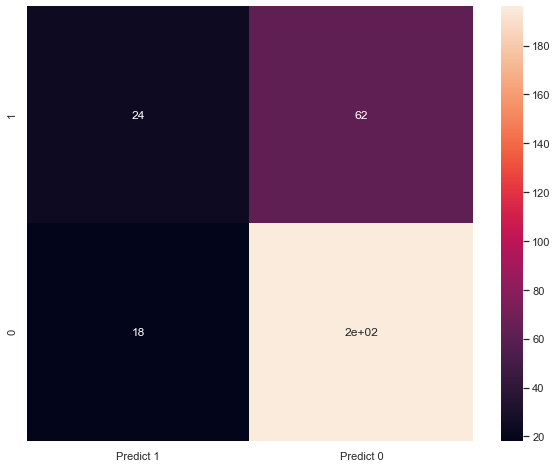

In [22]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)

# 12.  Make a predicted probability distribution plot for defaulters and non defaulters

In [23]:
preddf.head()

,Risk_pred
0,0
1,0
2,0
3,0
4,1


# 13. Give your conclusion for the problem. Which evaluation metric would you choose? 